**EDA**

Banks and Financial Services are responsible in preventing financial fraud. 

Financial fraud occurs only about 0.13% of total transaction. But when it does occurs, it may cause a huge amount of loss.

Detecting financial fraud might cause a lot of work if it's done manually, considering there are massive amount of transaction happens every day. Therefore, we need machine learning in order to solve this problem elegantly.

**EDA Conclusion**

- Fraud occurs in 0.13% of every types of transaction


- Transfer and Cashing Out, are types of transaction with possible financial fraud
    - Fraud occurs in 0.77% of every Transfer Transaction
    - Fraud occurs in 0.18% of every Cashing Transaction


- Cashing In, Debit, and Payment are very unlikely to be linked with financial fraud

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [23]:
df = pd.read_csv('financial_fraud_detection.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [25]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [26]:
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [27]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [28]:
df.describe(include='O')

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C724452879,C1286084959
freq,2237500,3,113


Change Data Type

In [29]:
def ido(x):
    return x[1:]
def idd(x):
    return x[:1]

df['nameOrig'] = df['nameOrig'].apply(ido)
df['nameOrig'] = df['nameOrig'].astype(int)

df['codeDest'] = df['nameDest'].apply(idd)
df['nameDest'] = df['nameDest'].apply(ido)
df['nameDest'] = df['nameDest'].astype(int)

Encoding

In [30]:
df['codeDest'] = df['codeDest'].map({
    'C' : 0,
    'M' : 1
})

In [31]:
dfcorr = pd.get_dummies(data=df, columns=['type'])

In [32]:
dfcorr.corr()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,codeDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
step,1.000000,0.022373,0.000158,-0.010058,-0.010299,0.000413,0.027665,0.025888,0.031578,0.003277,0.004926,0.004077,-0.012918,0.002869,0.004926,0.006925
amount,0.022373,1.000000,-0.000292,-0.002762,-0.007861,-0.001012,0.294137,0.459304,0.076688,0.012295,-0.197444,-0.009621,-0.004376,-0.023379,-0.197444,0.365896
nameOrig,0.000158,-0.000292,1.000000,-0.000770,-0.000740,-0.000553,-0.000236,-0.000360,0.000470,-0.000167,0.000234,-0.000324,0.000070,-0.000505,0.000234,0.000110
oldbalanceOrg,-0.010058,-0.002762,-0.000770,1.000000,0.998803,-0.000584,0.066243,0.042029,0.010154,0.003835,-0.189486,0.506761,-0.200899,-0.021450,-0.189486,-0.081593
newbalanceOrig,-0.010299,-0.007861,-0.000740,0.998803,1.000000,-0.000602,0.067812,0.041837,-0.008148,0.003776,-0.193915,0.527373,-0.210977,-0.021872,-0.193915,-0.087355
nameDest,0.000413,-0.001012,-0.000553,-0.000584,-0.000602,1.000000,-0.001127,-0.001118,-0.000141,0.000440,0.000860,-0.001023,0.000186,-0.000287,0.000860,-0.000177
oldbalanceDest,0.027665,0.294137,-0.000236,0.066243,0.067812,-0.001127,1.000000,0.976569,-0.005885,-0.000513,-0.231455,0.076105,0.086028,0.009347,-0.231455,0.130476
newbalanceDest,0.025888,0.459304,-0.000360,0.042029,0.041837,-0.001118,0.976569,1.000000,0.000535,-0.000529,-0.238315,0.034988,0.093476,0.006346,-0.238315,0.191701
isFraud,0.031578,0.076688,0.000470,0.010154,-0.008148,-0.000141,-0.005885,0.000535,1.000000,0.044109,-0.025697,-0.019089,0.011256,-0.002911,-0.025697,0.053869
isFlaggedFraud,0.003277,0.012295,-0.000167,0.003835,0.003776,0.000440,-0.000513,-0.000529,0.044109,1.000000,-0.001133,-0.000842,-0.001168,-0.000128,-0.001133,0.005245


**Checking Data Distribution and Outliers**

AxesSubplot(0.125,0.125;0.775x0.755)


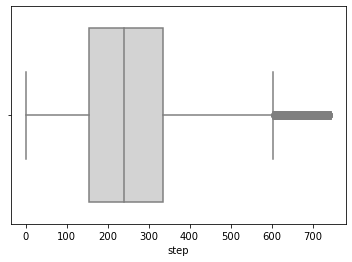

In [37]:
print(sns.boxplot(df['step'], color='lightgrey'))

AxesSubplot(0.125,0.125;0.775x0.755)


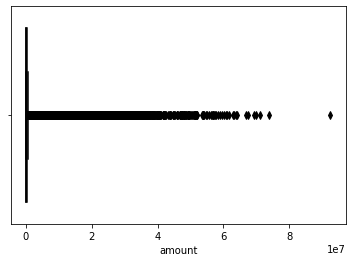

In [38]:
print(sns.boxplot(df['amount'], color='black'))

AxesSubplot(0.125,0.125;0.775x0.755)


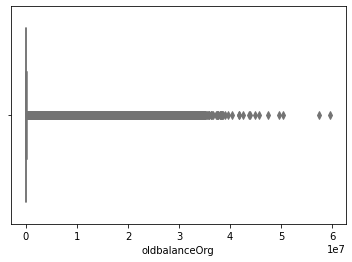

In [39]:
print(sns.boxplot(df['oldbalanceOrg'], color='lightgreen'))

AxesSubplot(0.125,0.125;0.775x0.755)


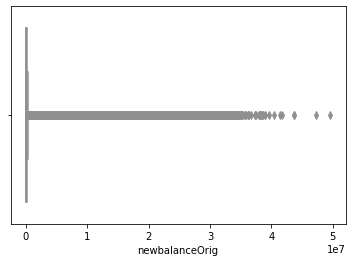

In [42]:
print(sns.boxplot(df['newbalanceOrig'], color='lightyellow'))

AxesSubplot(0.125,0.125;0.775x0.755)


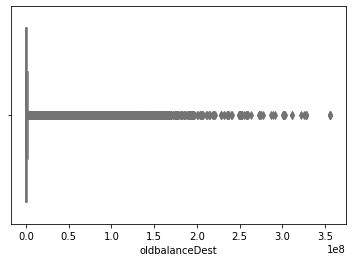

In [43]:
print(sns.boxplot(df['oldbalanceDest'], color='lightgreen'))

AxesSubplot(0.125,0.125;0.775x0.755)


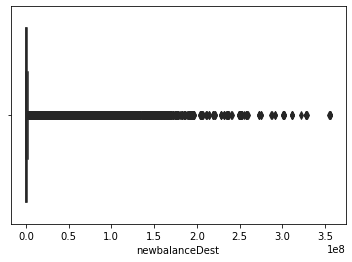

In [44]:
print(sns.boxplot(df['newbalanceDest'], color='green'))

In [51]:
(pd.crosstab(index=df['isFraud'], columns=df['type'], normalize=True)*100).round(3)

type,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
isFraud,,,,,
0,21.992,35.102,0.651,33.815,8.311
1,0.000,0.065,0.000,0.000,0.064


In [69]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [116]:
(df['type'][df['isFraud']==1]).value_counts()

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64

**Non Fraud Transcation Percentage**

In [141]:
print('Non-Fraud Transcation %:')
print('')
print(((df['type'][df['isFraud']==0].value_counts()/df['type'].value_counts())*100).round(2))

Non-Fraud Transcation %:

CASH_OUT     99.82
PAYMENT     100.00
CASH_IN     100.00
TRANSFER     99.23
DEBIT       100.00
Name: type, dtype: float64


**Fraud Transcation Percentage**

In [144]:
print('Fraud Transcation %:')
print('')
print((100-(df['type'][df['isFraud']==0].value_counts()/df['type'].value_counts())*100).round(2))

Fraud Transcation %:

CASH_OUT    0.18
PAYMENT     0.00
CASH_IN     0.00
TRANSFER    0.77
DEBIT       0.00
Name: type, dtype: float64
